In [1]:
import pandas as pd
import numpy as np 

import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [21]:
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
item_cats = pd.read_csv('item_categories.csv')
sales = pd.read_csv('sales_train.csv')
test  = pd.read_csv('test.csv')

In [22]:
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [23]:
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [24]:
item_cats.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [25]:
sales.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [26]:
test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


## Exploratory Data Analysis

In [27]:
from datetime import datetime
sales['year'] = pd.to_datetime(sales['date']).dt.strftime('%Y')
sales['month'] = sales.date.apply(lambda x: datetime.strptime(x,'%d.%m.%Y').strftime('%m'))
sales.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
0,02.01.2013,0,59,22154,999.0,1.0,2013,01
1,03.01.2013,0,25,2552,899.0,1.0,2013,01


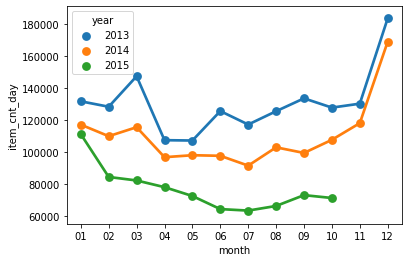

In [9]:
grouped = pd.DataFrame(sales.groupby(['year','month'])['item_cnt_day'].sum().reset_index())
sns.pointplot(x='month', y='item_cnt_day', hue='year', data=grouped)

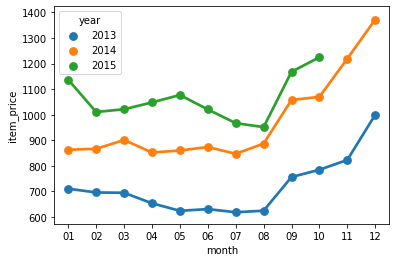

In [10]:
grouped_price = pd.DataFrame(sales.groupby(['year','month'])['item_price'].mean().reset_index())
sns.pointplot(x='month', y='item_price', hue='year', data=grouped_price)

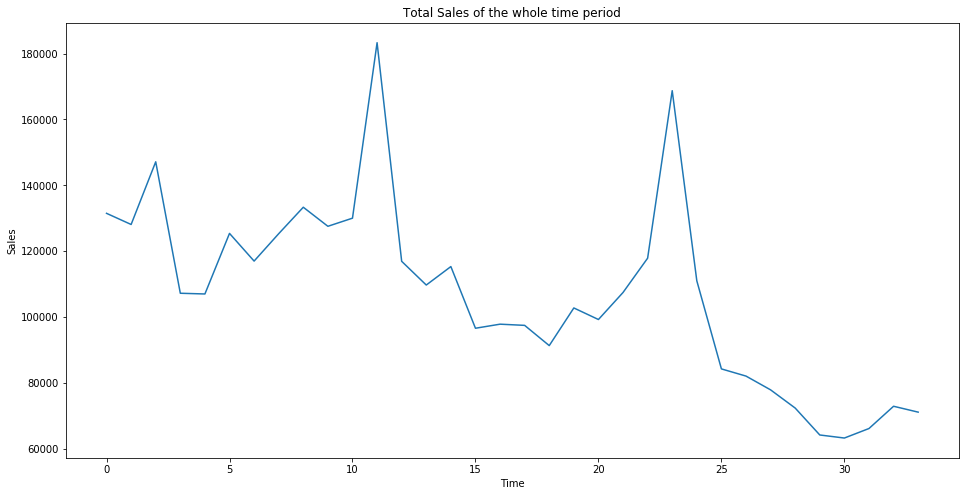

In [11]:
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the whole time period')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

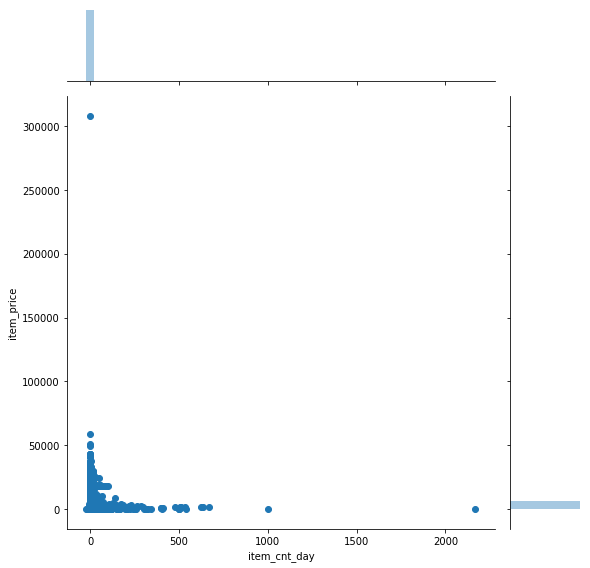

In [12]:
sns.jointplot(x="item_cnt_day", y="item_price", data=sales, height=8)
plt.show()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

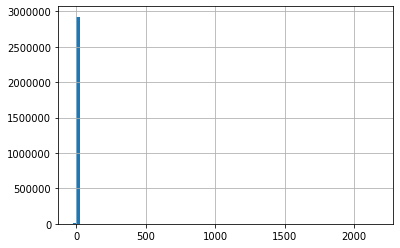

In [13]:
sales.item_cnt_day.hist(bins=100)
sales.item_cnt_day.describe()

## Data Cleaning

In [14]:
print('Data set size before remove item price 0 cleaning:', sales.shape)
sales = sales.query('item_price > 0')
print('Data set size after remove item price 0 cleaning:', sales.shape)

Data set size before remove item price 0 cleaning: (2935849, 8)
Data set size after remove item price 0 cleaning: (2935848, 8)


In [15]:
print('Data set size before filter valid:', sales.shape)
sales = sales[sales['shop_id'].isin(test['shop_id'].unique())]
sales = sales[sales['item_id'].isin(test['item_id'].unique())]
print('Data set size after filter valid:', sales.shape)

Data set size before filter valid: (2935848, 8)
Data set size after filter valid: (1224439, 8)


In [16]:
print('Data set size before remove outliers:', sales.shape)
sales = sales.query('item_cnt_day >= 0 and item_cnt_day <= 125 and item_price < 75000')
print('Data set size after remove outliers:', sales.shape)

Data set size before remove outliers: (1224439, 8)
Data set size after remove outliers: (1221451, 8)


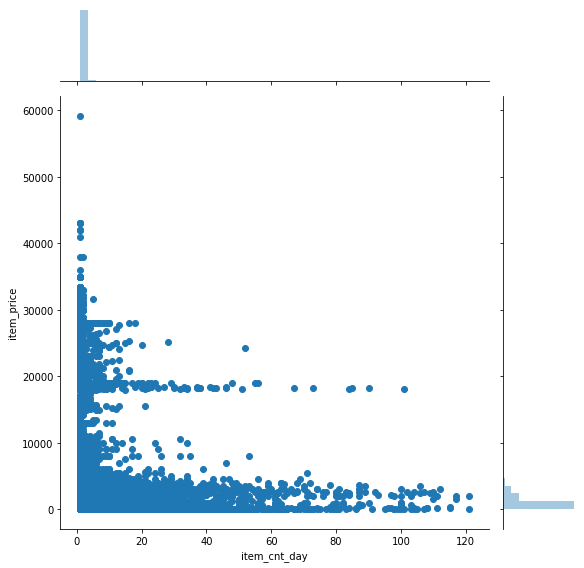

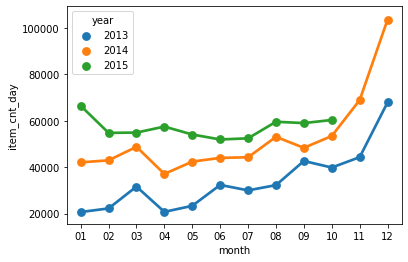

In [17]:
sns.jointplot(x="item_cnt_day", y="item_price", data=sales, height=8)
plt.show()

cleaned = pd.DataFrame(sales.groupby(['year','month'])['item_cnt_day'].sum().reset_index())
sns.pointplot(x='month', y='item_cnt_day', hue='year', data=cleaned)

## Feature Selection

In [18]:
monthly_sales=sales.groupby(["date_block_num","shop_id","item_id"])[
    "date_block_num","date","item_price","item_cnt_day"].agg({"date_block_num":'mean',"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})
monthly_sales.head(5)

C:\Users\charu\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


date_block_num        date              \
                                         mean         min         max   
date_block_num shop_id item_id                                          
0              2       33                   0  05.01.2013  05.01.2013   
                       482                  0  16.01.2013  16.01.2013   
                       491                  0  09.01.2013  09.01.2013   
                       839                  0  22.01.2013  22.01.2013   
                       1007                 0  11.01.2013  25.01.2013   

                               item_price item_cnt_day  
                                     mean          sum  
date_block_num shop_id item_id                          
0              2       33           499.0          1.0  
                       482         3300.0          1.0  
                       491          600.0          1.0  
                       839         3300.0          1.0  
                       1007         449.0          3.0

In [28]:
sales_data_flat = monthly_sales.item_cnt_day.apply(list).reset_index()
sales_data_flat = pd.merge(test,sales_data_flat,on = ['item_id','shop_id'],how = 'left')
sales_data_flat.fillna(0,inplace = True)
sales_data_flat.drop(['shop_id','item_id'],inplace = True, axis = 1)
sales_data_flat.head(20)

,ID,date_block_num,sum
0,0,20.0,1.0
1,0,22.0,1.0
2,0,23.0,2.0
3,0,24.0,2.0
4,0,28.0,1.0
5,0,29.0,1.0
6,0,30.0,1.0
7,0,31.0,3.0
8,0,32.0,1.0
9,1,0.0,0.0


In [29]:
pivoted_sales = sales_data_flat.pivot_table(index='ID', columns='date_block_num',fill_value = 0,aggfunc='sum' )
pivoted_sales.head(20)

sum                                               ...       \
date_block_num 0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0   ... 24.0   
ID                                                                ...        
0                 0    0    0    0    0    0    0    0    0    0  ...    2   
1                 0    0    0    0    0    0    0    0    0    0  ...    0   
2                 0    0    0    0    0    0    0    0    0    0  ...    0   
3                 0    0    0    0    0    0    0    0    0    0  ...    0   
4                 0    0    0    0    0    0    0    0    0    0  ...    0   
5                 0    0    0    0    0    0    0    0    0    0  ...    1   
6                 0    0    0    0    0    0    0    0    0    0  ...    0   
7                 0    0    0    0    0    0    0    0    0    0  ...    0   
8                 0    0    0    0    0    0    0    0    0    0  ...    9   
9                 0    0    0    0    0    0    0    0    0    0  ...    0   
10                0    0    0    0    0    0    0    0    0    0  ...    4   
11                0    0    0    0    0    0    0    0    0    0  ...    0   
12                0    0    1    0    1    0    0    0    0    0  ...    0   
13                0    0    0    0    0    0    0    0    0    0  ...    3   
14                0    0    0    0    0    0    1    5    4    4  ...    7   
15                0    0    0    0    0    0    0    0    0    0  ...    4   
16                0    0    0    0    0    0    0    0    0    0  ...    0   
17                0    0    0    0    0    0    0    0    0    0  ...    0   
18                0    0    0    0    0    0    0    0    0    0  ...    0   
19                0    0    0    0    0    0    0    0    0    0  ...    0   

                                                             
date_block_num 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0  
ID                                                           
0                 0    0    0    1    1    1    3    1    0  
1                 0    0    0    0    0    0    0    0    0  
2                 0    0    0    3    2    0    1    3    1  
3                 0    0    0    0    0    0    1    0    0  
4                 0    0    0    0    0    0    0    0    0  
5                 0    0    0    3    0    0    0    1    1  
6                 0    0    0    0    0    0    0    3    2  
7                 0    1    0    0    1    0    0    0    0  
8                 2    3    2    2    4    3    2    3    0  
9                 0    0    0    0    0    0    0    0    0  
10                3    6    2    6    6    5    5    2    3  
11                0    0    0    0    0    0    0    1    0  
12                0    0    0    0    0    0    0    0    0  
13                3    1    0    0    3    1    1    0    0  
14                1    3    1    1    1    4    3    2    2  
15                1    7    1    6    1    1    2    1    6  
16                0    0    0    0    0    0    0    0    0  
17                0    0    0    0    1    0    0    0    0  
18                0    0    9    5    3    2    2    2    2  
19                0    0    0    0    0    0    0    0    0  

[20 rows x 34 columns]

## Split train and test set

In [40]:
X_train = pivoted_sales.values[:,:-1]
y_train = pivoted_sales.values[:,-1:]

X_test = pivoted_sales.values[:,1:]

print(X_train.shape,y_train.shape,X_test.shape)

(214200, 33) (214200, 1) (214200, 33)


## Create XGBoost model

In [43]:
from xgboost import XGBRegressor
from xgboost import plot_importance

model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=1, 
    eta=0.3,    
    seed=42)

In [44]:
model.fit(X_train, y_train,  eval_metric="rmse", eval_set=[(X_train, y_train)], verbose=True, early_stopping_rounds = 10)

[23:59:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.31526
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:2.18748
[2]	validation_0-rmse:2.07627
[3]	validation_0-rmse:1.96905
[4]	validation_0-rmse:1.88021
[5]	validation_0-rmse:1.80236
[6]	validation_0-rmse:1.7311
[7]	validation_0-rmse:1.66225
[8]	validation_0-rmse:1.60404
[9]	validation_0-rmse:1.55448
[10]	validation_0-rmse:1.5127
[11]	validation_0-rmse:1.47586
[12]	validation_0-rmse:1.44082
[13]	validation_0-rmse:1.40691
[14]	validation_0-rmse:1.3821
[15]	validation_0-rmse:1.35809
[16]	validation_0-rmse:1.33759
[17]	validation_0-rmse:1.31971
[18]	validation_0-rmse:1.30432
[19]	validation_0-rmse:1.29109
[20]	validation_0-rmse:1.28035
[21]	validation_0-rmse:1.27108
[22]	validation_0-rmse:1.26205
[23]	validation_0-rmse:1.25424
[24]	validation_0-rmse:1.24673
[25]	validation_0-rmse:1.24128
[26]	validation_0-rmse:1.2

[255]	validation_0-rmse:1.16142
[256]	validation_0-rmse:1.16095
[257]	validation_0-rmse:1.16091
[258]	validation_0-rmse:1.16064
[259]	validation_0-rmse:1.1603
[260]	validation_0-rmse:1.16011
[261]	validation_0-rmse:1.15983
[262]	validation_0-rmse:1.15967
[263]	validation_0-rmse:1.15953
[264]	validation_0-rmse:1.15929
[265]	validation_0-rmse:1.15918
[266]	validation_0-rmse:1.15901
[267]	validation_0-rmse:1.15892
[268]	validation_0-rmse:1.15874
[269]	validation_0-rmse:1.1586
[270]	validation_0-rmse:1.15846
[271]	validation_0-rmse:1.15839
[272]	validation_0-rmse:1.15827
[273]	validation_0-rmse:1.15824
[274]	validation_0-rmse:1.15806
[275]	validation_0-rmse:1.1579
[276]	validation_0-rmse:1.15776
[277]	validation_0-rmse:1.15771
[278]	validation_0-rmse:1.15762
[279]	validation_0-rmse:1.15758
[280]	validation_0-rmse:1.15754
[281]	validation_0-rmse:1.15743
[282]	validation_0-rmse:1.15726
[283]	validation_0-rmse:1.15725
[284]	validation_0-rmse:1.15714
[285]	validation_0-rmse:1.15713
[286]	valid

[513]	validation_0-rmse:1.14521
[514]	validation_0-rmse:1.14519
[515]	validation_0-rmse:1.14518
[516]	validation_0-rmse:1.14515
[517]	validation_0-rmse:1.14509
[518]	validation_0-rmse:1.14506
[519]	validation_0-rmse:1.14502
[520]	validation_0-rmse:1.14488
[521]	validation_0-rmse:1.14488
[522]	validation_0-rmse:1.14471
[523]	validation_0-rmse:1.1446
[524]	validation_0-rmse:1.14459
[525]	validation_0-rmse:1.14457
[526]	validation_0-rmse:1.14452
[527]	validation_0-rmse:1.1445
[528]	validation_0-rmse:1.1445
[529]	validation_0-rmse:1.14447
[530]	validation_0-rmse:1.14441
[531]	validation_0-rmse:1.1444
[532]	validation_0-rmse:1.1444
[533]	validation_0-rmse:1.14439
[534]	validation_0-rmse:1.14439
[535]	validation_0-rmse:1.14434
[536]	validation_0-rmse:1.14431
[537]	validation_0-rmse:1.14413
[538]	validation_0-rmse:1.14409
[539]	validation_0-rmse:1.14408
[540]	validation_0-rmse:1.14407
[541]	validation_0-rmse:1.14406
[542]	validation_0-rmse:1.14406
[543]	validation_0-rmse:1.14404
[544]	validat

[771]	validation_0-rmse:1.13864
[772]	validation_0-rmse:1.13864
[773]	validation_0-rmse:1.13863
[774]	validation_0-rmse:1.13862
[775]	validation_0-rmse:1.13862
[776]	validation_0-rmse:1.13858
[777]	validation_0-rmse:1.13858
[778]	validation_0-rmse:1.13857
[779]	validation_0-rmse:1.13857
[780]	validation_0-rmse:1.13857
[781]	validation_0-rmse:1.13856
[782]	validation_0-rmse:1.13854
[783]	validation_0-rmse:1.13854
[784]	validation_0-rmse:1.13853
[785]	validation_0-rmse:1.13851
[786]	validation_0-rmse:1.1385
[787]	validation_0-rmse:1.13846
[788]	validation_0-rmse:1.13845
[789]	validation_0-rmse:1.13843
[790]	validation_0-rmse:1.13841
[791]	validation_0-rmse:1.1384
[792]	validation_0-rmse:1.13839
[793]	validation_0-rmse:1.13839
[794]	validation_0-rmse:1.13838
[795]	validation_0-rmse:1.13835
[796]	validation_0-rmse:1.13834
[797]	validation_0-rmse:1.13833
[798]	validation_0-rmse:1.13833
[799]	validation_0-rmse:1.13832
[800]	validation_0-rmse:1.13832
[801]	validation_0-rmse:1.13832
[802]	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=0.5, missing=None,
             n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, silent=None, subsample=1, verbosity=1)

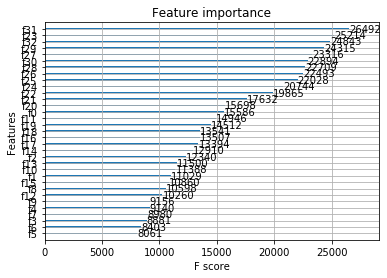

In [46]:
plot_importance(model)

## Predict Test

In [47]:
y_pred = model.predict(X_test)

In [52]:
y_pred = y_pred.clip(0,20)

In [53]:
y_pred.ravel()

array([0.44646788, 0.13203794, 0.5211306 , ..., 0.        , 0.13203794,
       0.15375262], dtype=float32)

## Create Submission

In [54]:
submission_df = pd.DataFrame({'ID': test['ID'], 'item_cnt_month': y_pred.ravel()})
submission_df.head()

,ID,item_cnt_month
0,0,0.446468
1,1,0.132038
2,2,0.521131
3,3,0.151904
4,4,0.132038


In [55]:
submission_df['item_cnt_month'].max()

20.0

In [56]:
submission_df.to_csv('submission.csv', index = False)